We want to highlight 10 wines to increase our sales. Which ones should we choose and why?

In [80]:
#importing the necessary libraries

import sqlite3 as sql
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as staticmethod


In [81]:
#connecting to the database
conn = sql.connect('vivino.db')
cursor = conn.cursor()



('Amarone della Valpolicella Classico Riserva', 4.8)
('Cabernet Sauvignon', 4.8)
('Mágico', 4.8)
('Fratini Bolgheri Superiore', 4.8)
('Cristal Rosé Vinothèque', 4.8)
('Batard-Montrachet Grand Cru', 4.8)
('IX Estate Red', 4.7)
('Special Selection Cabernet Sauvignon', 4.7)
('Unico Reserva Especial Edición', 4.7)
('Unico', 4.7)


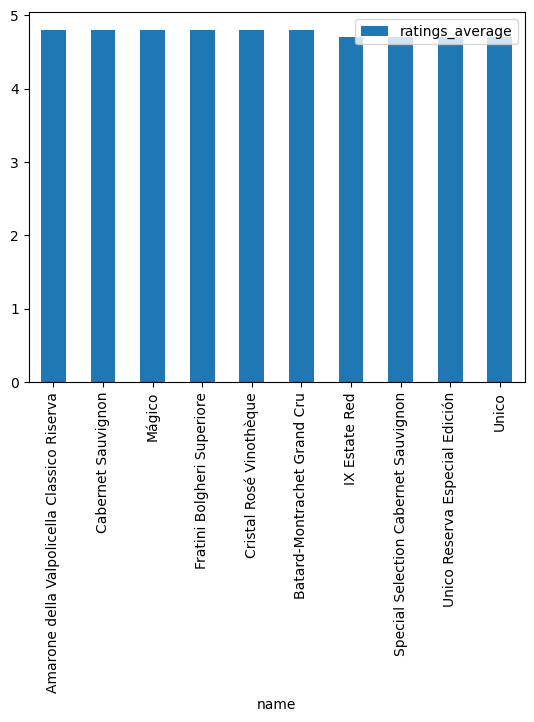

In [90]:
#We want to highlight 10 wines to increase our sales. Which ones should we choose and why?
cursor.execute("SELECT name, ratings_average FROM wines ORDER BY ratings_average DESC LIMIT 10")
best_reviews = cursor.fetchall()


for i in best_reviews:
    print(i)

worst_reviews = pd.DataFrame(best_reviews, columns=['name', 'ratings_average'])
worst_reviews.plot(kind='bar', x='name', y='ratings_average')   
plt.show()


('États-Unis', 12273684)
('France', 5973301)
('Italie', 4270717)
('Allemagne', 2549989)
('Espagne', 2264396)
('Suisse', 1601799)
('Portugal', 1123535)
('Australie', 1022965)
('Argentine', 629532)
('Chili', 326757)
('Afrique du Sud', 269649)
('Roumanie', 228185)
('Israël', 150549)
('Hongrie', 102235)
('Grèce', 95693)
('Croatie', 64223)
('Moldavie', 13583)


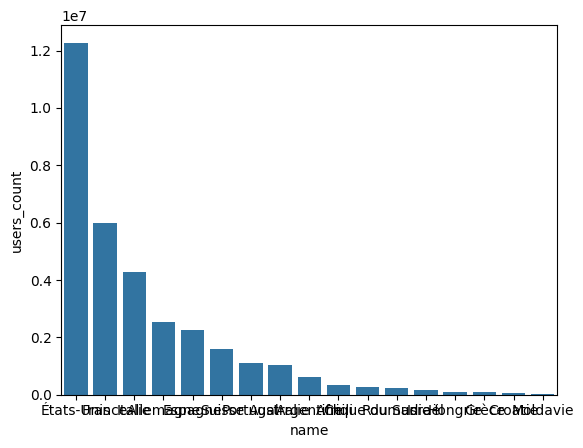

In [83]:
#We have a limited marketing budget for this year. Which country should we prioritise and why?

# Exécuter la requête pour trouver le pays avec le plus d'utilisateurs
cursor.execute("SELECT name, users_count FROM countries ORDER BY users_count DESC ")
most_users = cursor.fetchall()


# Affichage du résultat
for i in most_users:
    print(i)

most_users = pd.DataFrame(most_users, columns=['name', 'users_count'])
sns.barplot(x='name', y='users_count', data=most_users)
plt.show()




('France', 67553)
('Italie', 42399)
('États-Unis', 28145)
('Espagne', 18026)
('Australie', 13946)
('Allemagne', 13643)
('Portugal', 5834)
('Chili', 5785)
('Argentine', 5339)
('Afrique du Sud', 4227)
('Suisse', 3849)
('Hongrie', 1923)
('Grèce', 1294)
('Croatie', 980)
('Roumanie', 686)
('Israël', 529)
('Moldavie', 418)
The best wineries are: 
Winery ID: 11601, Rating Average: 4.8 Region ID: 3237
Winery ID: 14919, Rating Average: 4.8 Region ID: 105
Winery ID: 156664, Rating Average: 4.8 Region ID: 492
Winery ID: 277785, Rating Average: 4.8 Region ID: 3345
Winery ID: 1235, Rating Average: 4.8 Region ID: 409
Winery ID: 266660, Rating Average: 4.8 Region ID: 3036
Winery ID: 1456, Rating Average: 4.7 Region ID: 25
Winery ID: 1301, Rating Average: 4.7 Region ID: 25
Winery ID: 11050, Rating Average: 4.7 Region ID: 405
Winery ID: 11050, Rating Average: 4.7 Region ID: 405


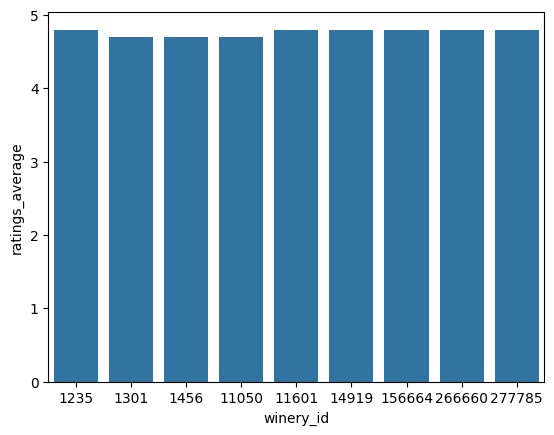

In [84]:
#We would like to give awards to the best wineries. Come up with 3 relevant ones. Which wineries should we choose and why?

cursor.execute("SELECT name, wineries_count FROM countries ORDER BY wineries_count DESc")  
most_wineries = cursor.fetchall()

for i in most_wineries:
    print(i)    

cursor.execute("SELECT winery_id, ratings_average, region_id FROM wines ORDER BY ratings_average DESC LIMIT 10")
best_wineries = cursor.fetchall()

# Affichage des résultats
print("The best wineries are: ")
for winery in best_wineries:
    print(f"Winery ID: {winery[0]}, Rating Average: {winery[1]}", f"Region ID: {winery[2]}")

best_wineries = pd.DataFrame(best_wineries, columns=['winery_id', 'ratings_average', 'region_id'])
sns.barplot(x='winery_id', y='ratings_average', data=best_wineries)


plt.show()



In [87]:
#We would like to select wines that are easy to find all over the world. 
#Find the top 3 most common grapes all over the world and for each grape, give us the the 5 best rated wines.

cursor.execute("SELECT grape_id FROM most_used_grapes_per_country ORDER BY COUNT(grape_id) DESC LIMIT 3")
most_common_grapes = cursor.fetchall()
for i in most_common_grapes:
    print(i)

OperationalError: misuse of aggregate: COUNT()